<div class="alert alert-success">  
</div>

<div>
    <h2 align="center">Astonishments of</h2> 
    <h1 align="center">Logistic equation & Feigenbaum constant</h1>            
    <h4 align="center">By: Somayyeh Gholami & Mehran Kazeminia</h4>
</div>

<div class="alert alert-success">  
</div>

# <span style="color:darkgray;">PLAN - 1</span>

# [Logistic Equation](https://mathworld.wolfram.com/LogisticEquation.html)

The logistic equation (sometimes called the Verhulst model or logistic growth curve) is a model of population growth first published by Pierre Verhulst (1845, 1847). The model is continuous in time, but a modification of the continuous equation to a discrete quadratic recurrence equation known as the logistic map is also widely used.

\begin{align*}
\frac{d_x}{d_t}&= Rx (1 - x)\\
\\x_{t+1}&= Rx_t (1 - x_t)
\end{align*}

The first few iterations of the logistic map:

\begin{align*}
x_1&= Rx_0(1-x_0)\\
x_2&= R^2(1-x_0)x_0(1-Rx_0+Rx_0^2)\\
x_3&= R^3(1-x_0)x_0(1-Rx_0+Rx_0^2)×(1-R^2x_0+R^2x_0^2+R^3x_0^2-2R^3x_0^3+R^3x_0^4)\\
\end{align*}



We use the above equation a lot in this notebook and our favorite ranges for **x0** and **R** are as follows:

*  The value of **x0** is between **zero** and **one**.

*  The value of **R** is between **two** and **four**.

* Obviously, in the above ranges, the results for the **"new x"** will still be between **zero** and **one**. So the next repetitions can continue and it is good for us.

When the value of R changes between two and four, the behavior of this equation is very interesting. If R = 4, the results of this equation become chaotic, and with the slightest change in the value of x0, we see a very large change in the result. In this case, the results of this equation are practically unpredictable. In other words, a completely definite equation produces random results.



<div class="alert alert-success">  
</div>

In [1]:
import math
import random

import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px

import statistics
from collections import Counter

%matplotlib inline

In [2]:
def logistic (R, x0, N, png_counter):    
    x = x0
    x_list = [x0]
    for i in range(N-1):      
        x = R * x * (1. - x)
        x_list.append(x)
        
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(16, 6), facecolor='lightgray')
    plt.xlabel('The number of iterations')
    plt.ylabel('The value of x')
    plt.title(f'\nLogistic Equation\n\nR={R}  |  x0={x0}\n')
    plt.plot(x_list, 'o:r')
    plt.show()

    if (png_counter != 0):
        plt.savefig(f'logistic_equation_{png_counter}.png')

#### If R = 2, after a few iterations, the result will be 0.5. (Fixed Point)

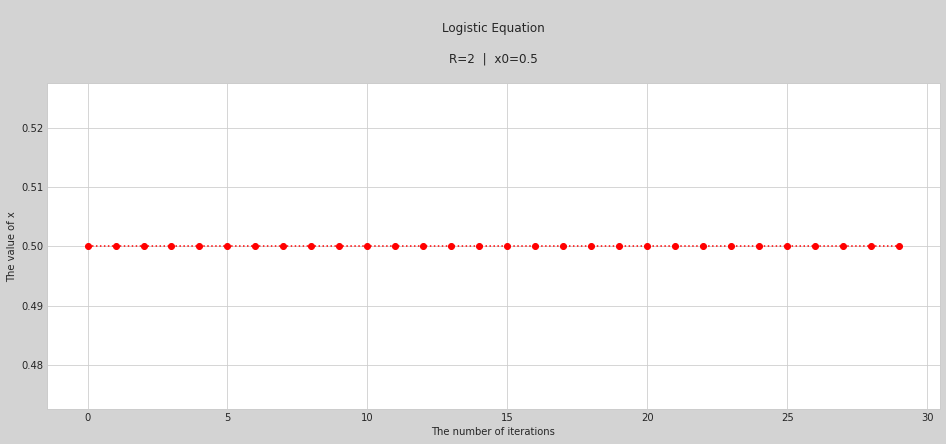

<Figure size 432x288 with 0 Axes>

In [3]:
logistic(2, 0.5, 30, 101)

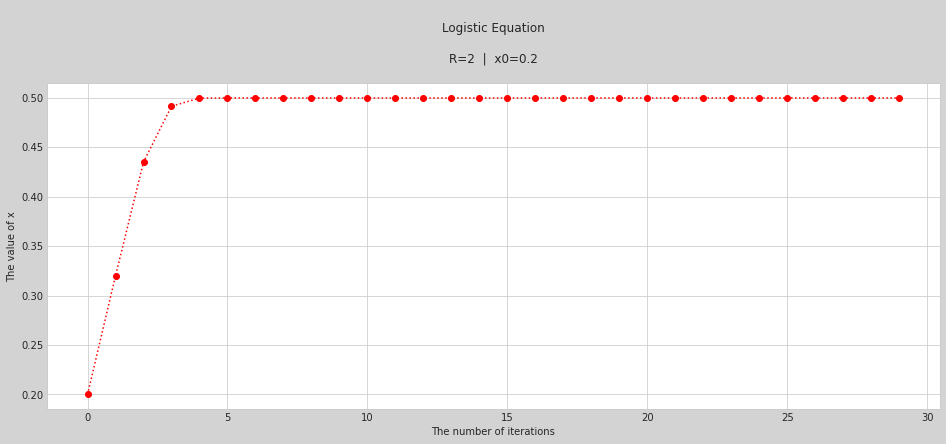

<Figure size 432x288 with 0 Axes>

In [4]:
logistic(2, 0.2, 30, 102)

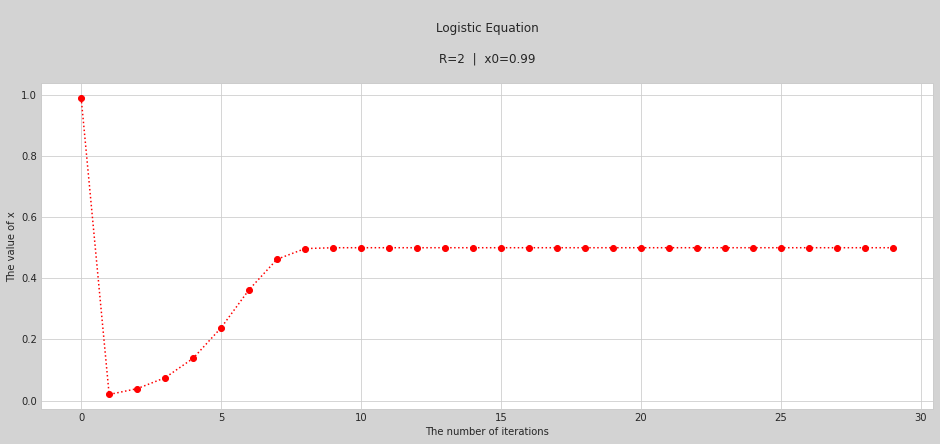

<Figure size 432x288 with 0 Axes>

In [5]:
logistic(2, 0.99, 30, 103)

#### If R = 2.5, after a few iterations, the result will be 0.6. (Fixed Point)

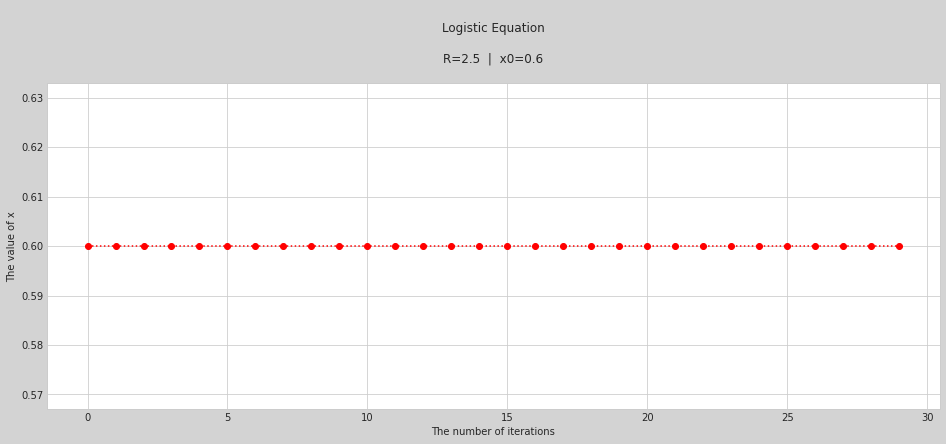

<Figure size 432x288 with 0 Axes>

In [6]:
logistic(2.5, 0.6, 30, 104)

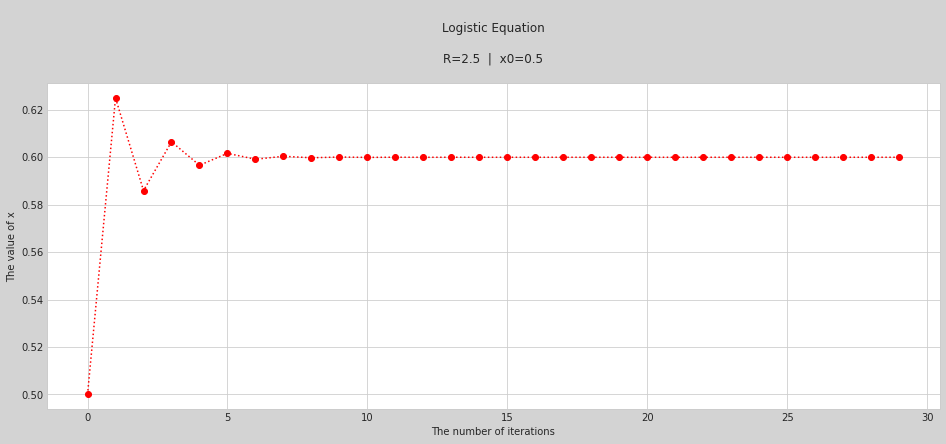

<Figure size 432x288 with 0 Axes>

In [7]:
logistic(2.5, 0.5, 30, 105)

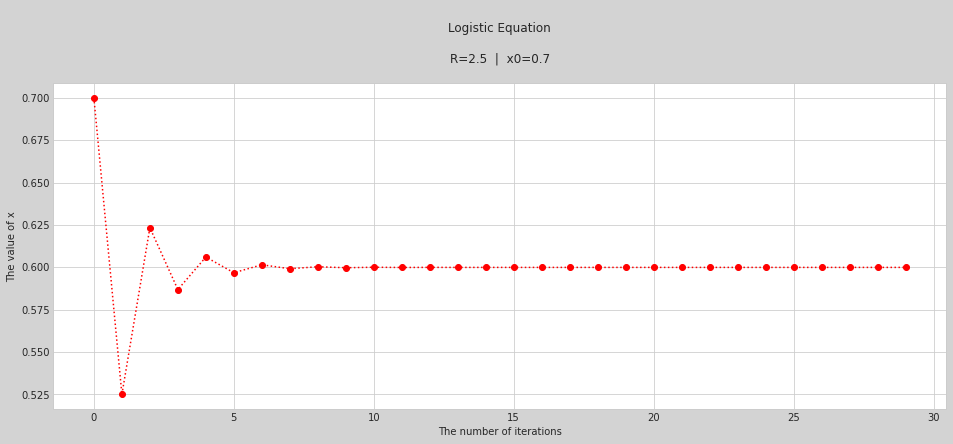

<Figure size 432x288 with 0 Axes>

In [8]:
logistic(2.5, 0.7, 30, 105)

#### If R = 3.1, after a few iterations, two results are obtained alternately. (Period=2)

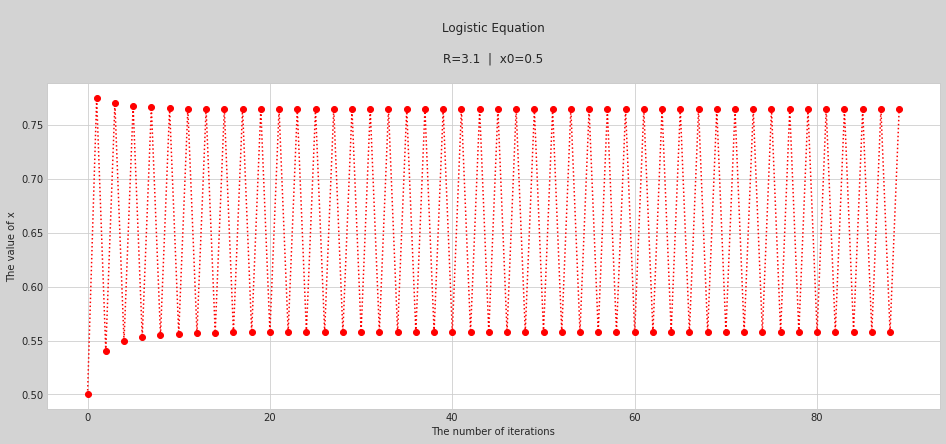

<Figure size 432x288 with 0 Axes>

In [9]:
logistic(3.1, 0.5, 90, 106)

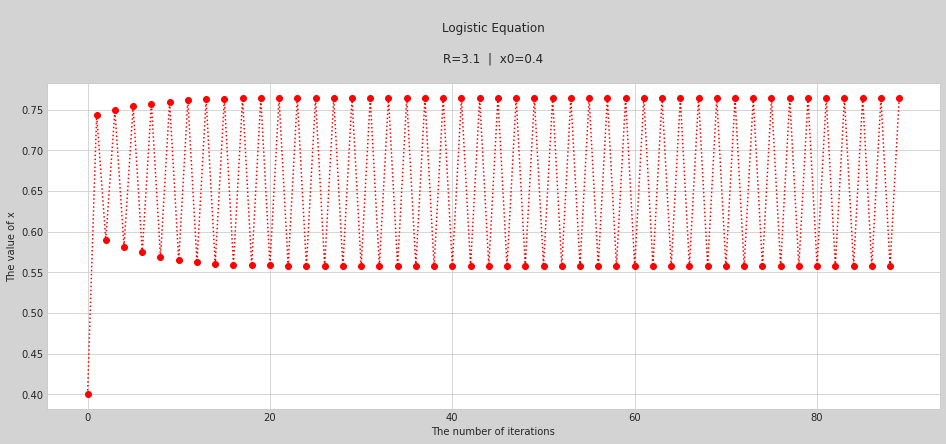

<Figure size 432x288 with 0 Axes>

In [10]:
logistic(3.1, 0.4, 90, 107)

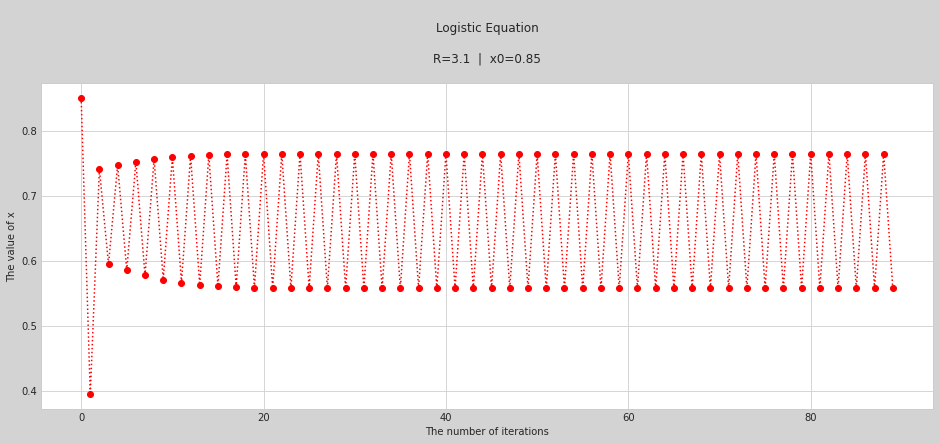

<Figure size 432x288 with 0 Axes>

In [11]:
logistic(3.1, 0.85, 90, 108)

#### If the value of "R" is between 3.4 and 3.5, after a few iterations, four results are obtained alternately. (Period=4)

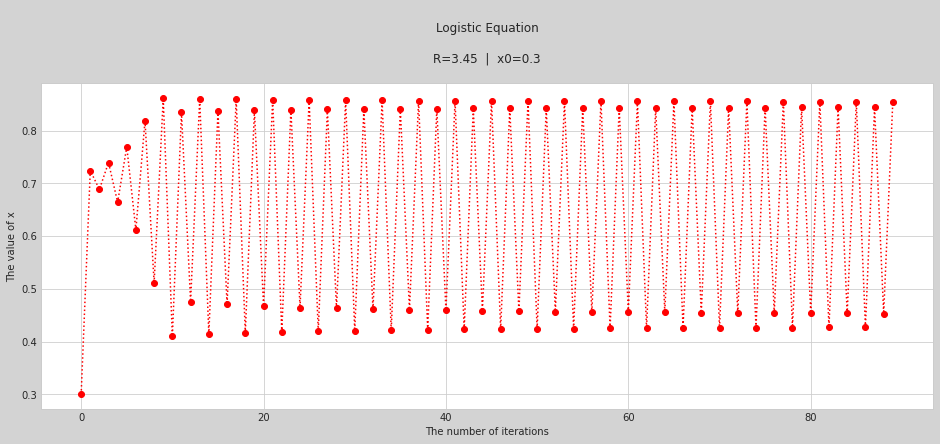

<Figure size 432x288 with 0 Axes>

In [12]:
logistic(3.45, 0.30, 90, 109)

#### If the value of "R" is between 3.55 and 3.56, after a few iterations, eight results are obtained alternately. (Period=8)

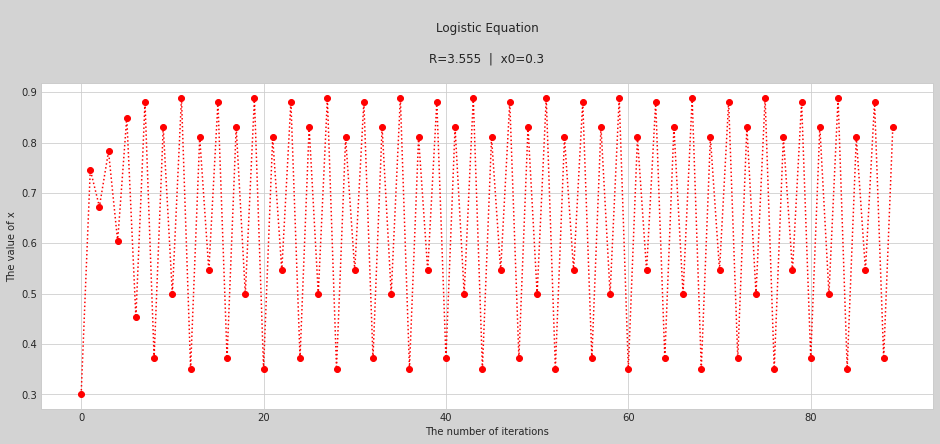

<Figure size 432x288 with 0 Axes>

In [13]:
logistic(3.555, 0.30, 90, 110)

#### If R = 3.569946, the results will be different. ($Period\rightarrow \infty$)


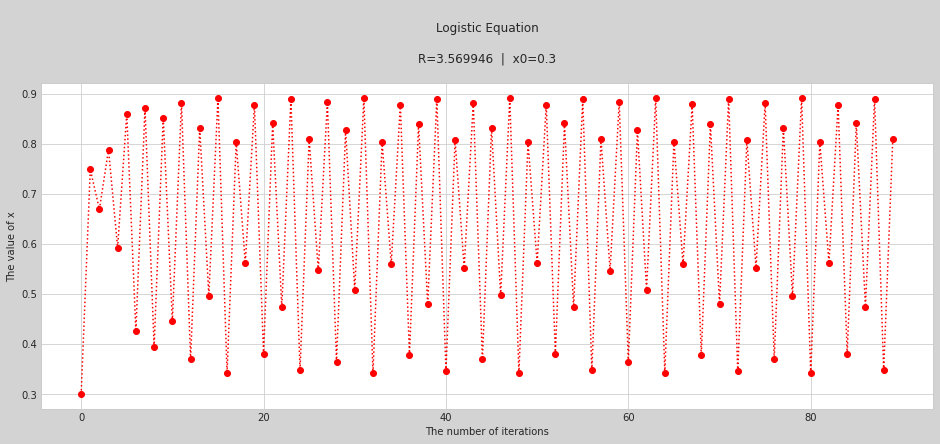

<Figure size 432x288 with 0 Axes>

In [14]:
logistic(3.569946, 0.30, 90, 111)

<div class="alert alert-success">
    <h3 align="center">Chaos in the results of "Logistic Equation"</h3>
</div>

#### If R = 4, the results will be chaotic. ($Period\rightarrow \infty$)


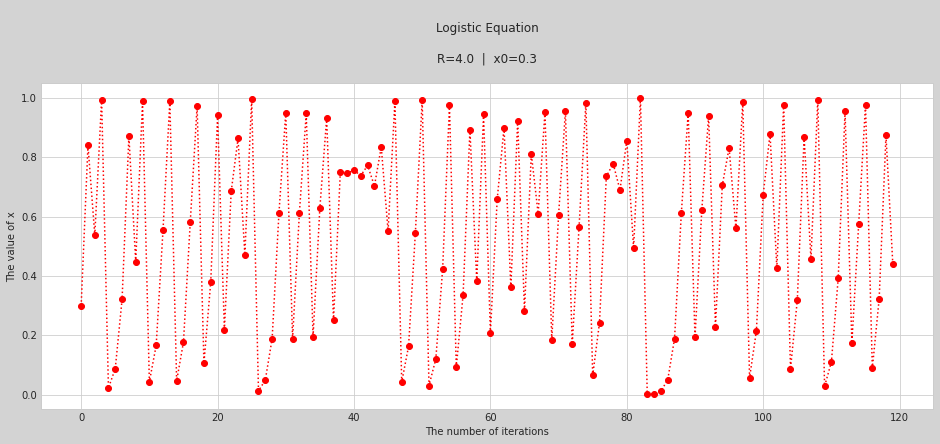

<Figure size 432x288 with 0 Axes>

In [15]:
logistic(4.0, 0.30, 120, 201)

#### If we give only a very very small change in the value of x0, the result is completely different and unpredictable.

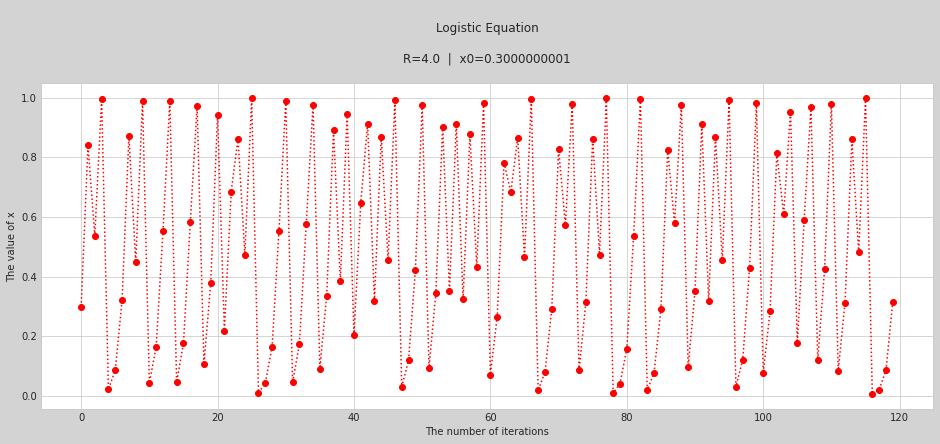

<Figure size 432x288 with 0 Axes>

In [16]:
logistic(4.0, 0.3000000001, 120, 202)

## Histogram Graph

In [17]:
R = 4.0
N = 120

x0_a = 0.3
x0_b = 0.3000000001
x_list_a = [x0_a]
x_list_b = [x0_b]

x_a = x0_a
x_b = x0_b
for i in range(N-1):   
    x_a = R * x_a * (1. - x_a)
    x_b = R * x_b * (1. - x_b)
    
    x_list_a.append(x_a)
    x_list_b.append(x_b)

hist_data = [x_list_b, x_list_a]  
group_labels = ['x0 = 0.3000000001', 'x0 = 0.3']   
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False) 
fig.show()

#### The "Logistics Equation" seems extremely simple and completely deterministic. 

#### But as you can see, if "R = 4.0" the results are very random and even "Logistic Equation" is used to generate random numbers.

<div class="alert alert-success">  
</div>

# The bifurcation diagram of the Logistic Equation 

* We want to change the value of R between 2 and 4 and plot all the results in one graph. (1000 different values for R)

* Increase the number of iterations to 500 times. But we only draw the last hundred iterations. (The first 400 iterations are an opportunity to converge)

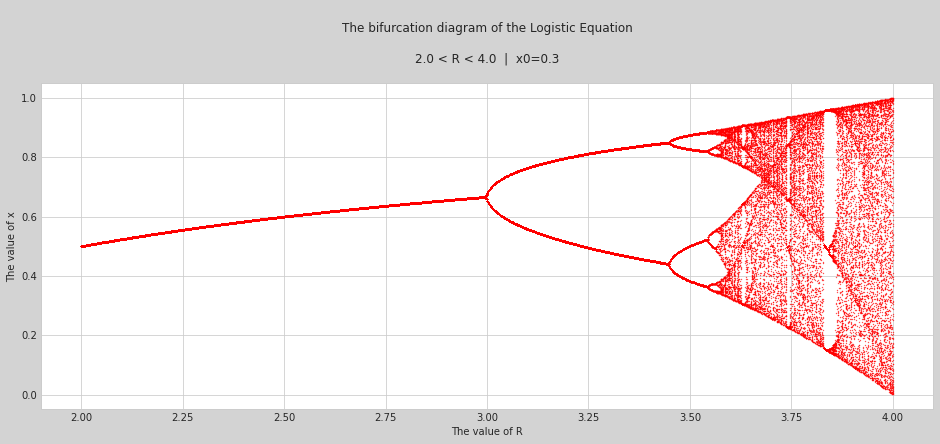

In [18]:
R_list = np.linspace(2.0, 4.0, 1000)
x0 = 0.3
N = 500

def logis(r):
    x_list = [x0]    
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[400:]

x_select = []
R_select = []
for r in R_list:
    x_select.append(logis(r))
    R_select.append([r] * 100) 
    
x_select = np.array(x_select).ravel()
R_select = np.array(R_select).ravel()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 6), facecolor='lightgray')
plt.xlabel('The value of R')
plt.ylabel('The value of x')
plt.title(f'\nThe bifurcation diagram of the Logistic Equation\n\n2.0 < R < 4.0  |  x0=0.3\n')
plt.scatter(R_select, x_select, color='red', s=0.1)
plt.savefig('bifurcation_diagram.png')
plt.show()

<div class="alert alert-success">  
</div>

# <span style="color:darkgray;">PLAN - 2</span>

# [Feigenbaum Constant](https://mathworld.wolfram.com/FeigenbaumConstant.html)

The Feigenbaum constant delta is a universal constant for functions approaching chaos via period doubling. It was discovered by Feigenbaum in 1975 (Feigenbaum 1979) while studying the fixed points of the iterated function.

The first Feigenbaum constant δ is the limiting ratio of each bifurcation interval to the next between every period doubling, of a one-parameter map.

30 decimal places : **δ = 4.669201609102990671853203820466**

**The results of Feigenbaum calculations, which almost correspond to the diagram above, are as follows:**

In [19]:
feigenbaum = pd.DataFrame()
feigenbaum['Period'] = [2, 4, 8, 16, 32, 64, 128, 256]
feigenbaum['Bifurcation parameter']= [3, 3.4494897, 3.5440903, 3.5644073, 3.5687594, 3.5696916, 3.5698913, 3.5699340]
feigenbaum['Ratio'] = ['N', 'N', 4.7514, 4.6562, 4.6683, 4.6686, 4.6692, 4.6694]
feigenbaum

,Period,Bifurcation parameter,Ratio
0,2,3.000000,N
1,4,3.449490,N
2,8,3.544090,4.7514
3,16,3.564407,4.6562
4,32,3.568759,4.6683
5,64,3.569692,4.6686
6,128,3.569891,4.6692
7,256,3.569934,4.6694


# Another astonishments of the Logistic Equation

The Feigenbaum constant is very important for understanding **complex natural systems** and has many applications in various sciences. For this reason, we want to do these calculations once again with our own computer model or high accuracy. We will see that the logistic equation has **other surprises**.

* For more accuracy, this time we will try 20,000 different values for R. Again, all of these values are between 2 and 4.

* Increase the number of iterations to 1200 times. But we only draw the last hundred iterations. (The first 200 iterations are an opportunity to converge)

* So we have 20,000 different values for R. First we want to do a thousand iterations for the first value of R. This way, in the beginning, we get a thousand results for the value of x. Then we count the number of different types of these 1000 results. For example, if all are equal, the number one, if there are two types of numbers, the number 2 (period=2) or if all the results are different, the number 1000 ($Period\rightarrow \infty$) is the result of the calculations of this step. The calculations for the first value of R are completed and fortunately only 199999 is left :) 

* All 20,000 results are plotted in the diagram below.


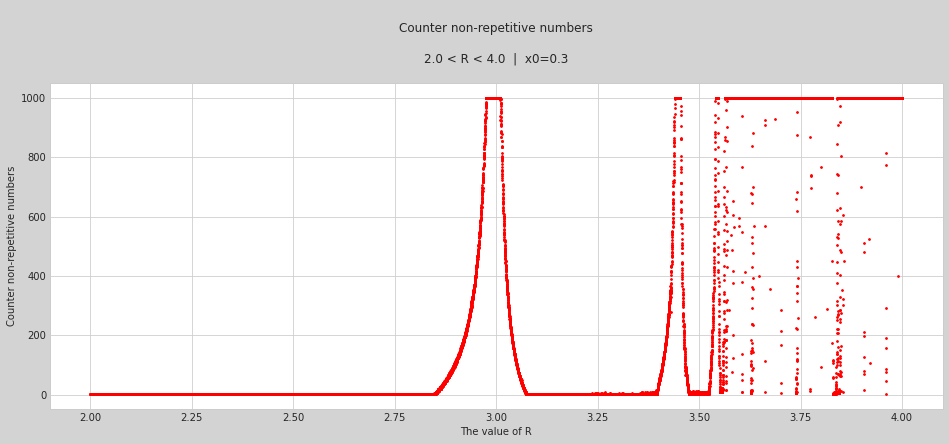

In [20]:
R_list = np.linspace(2.0, 4.0, 20000)
x0 = 0.3
N = 1200

def logis(r):
    x_list = [x0]    
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[200:]

non_repetitive = [] 
for r in R_list:
    non_repetitive.append(len(Counter(logis(r))))
    
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 6), facecolor='lightgray')
plt.xlabel('The value of R')
plt.ylabel('Counter non-repetitive numbers')
plt.title(f'\nCounter non-repetitive numbers\n\n2.0 < R < 4.0  |  x0=0.3\n')
plt.scatter(R_list, non_repetitive, color='red', s=3)
plt.savefig('non_repetitive_numbers.png')
plt.show()   

The diagram above shows that with the first 200 iterations, convergence does not occur in many places. Even in many places, every 1,000 of our results are different. Of course, you have already noticed that, for example, when "R = 4.0", there is chaos, and it is obvious that every 1000 results are different. But is there chaos just because of 1,000 different results?

The fact is that, If the initial number of repetitions becomes too large (for example, one or ten million repetitions), many of these points will converge. But some of them will still have 1000 different results. In addition, we have already explained the location of the bifurcation of the main diagram, and by looking closely at the diagram above, it is clear that convergence did not occur exactly within these points.

## Selected Points

Next, we increase the initial iterations to ten million times, but only the bifurcated points of the equation (as well as their midpoints). We will see that the bifurcated points of the equation will still not converge. That is, for example, at the point "R = 3.0", which is the first bifurcation point of the equation, we will have 1000 different results, while all 1000 results for the previous points are exactly the same, and 1000 results for the next points have only two different values (Period = 2). Even if you consider the initial number of 100 million iterations for the point "R = 3.0", it will still not converge and 1000 different results will be obtained.

Of course, the 1000 results obtained at the point "R = 3.0" are very little different from each other, and apparently there is no chaos like the point "R = 4.0". However, it is very likely that this equation is also used for very, very large numbers, and this problem should not be forgotten. For this reason, **we think this is another wonder of Logistic Equation**.


In [21]:
R_list = [2.8, 3.0, 3.2, 3.4494897, 3.5, 3.5440903, 3.55, 3.5644073, 3.566, 3.5687594 ,3.569, 3.5696916, 3.5697, 4.0]
x0 = 0.3
N = 10001000

def logis(r):
    x_list = [x0]    
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[10000000:]
results= pd.DataFrame()

for r in R_list:
    results[f'R={r}'] = logis(r)
    non_repetitive = len(Counter(logis(r))) 
    print(f'When R={r} the number of non-duplicate numbers is equal to:  {non_repetitive}')
    print('::' * 38)
    
print('\n\nTable of all results:')
print('='* 22 , '\n')
display(results)
display(results.describe().transpose())

When R=2.8 the number of non-duplicate numbers is equal to:  1
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.0 the number of non-duplicate numbers is equal to:  1000
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.2 the number of non-duplicate numbers is equal to:  2
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.4494897 the number of non-duplicate numbers is equal to:  1000
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.5 the number of non-duplicate numbers is equal to:  4
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.5440903 the number of non-duplicate numbers is equal to:  1000
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
When R=3.55 the number of non-duplicate numbers is equal to:  8
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

,R=2.8,R=3.0,R=3.2,R=3.4494897,R=3.5,R=3.5440903,R=3.55,R=3.5644073,R=3.566,R=3.5687594,R=3.569,R=3.5696916,R=3.5697,R=4.0
0,0.642857,0.666741,0.799455,0.439981,0.382820,0.363291,0.370326,0.374784,0.344955,0.343409,0.343136,0.343454,0.343419,0.429416
1,0.642857,0.666592,0.513045,0.849946,0.826941,0.819786,0.827805,0.835215,0.805777,0.804681,0.804430,0.804942,0.804904,0.980071
2,0.642857,0.666741,0.799455,0.439940,0.500884,0.523593,0.506031,0.490572,0.558081,0.560899,0.561483,0.560479,0.560562,0.078125
3,0.642857,0.666592,0.513045,0.849929,0.874997,0.884050,0.887371,0.890785,0.879470,0.878954,0.878758,0.879366,0.879332,0.288088
4,0.642857,0.666741,0.799455,0.439981,0.382820,0.363290,0.354800,0.346771,0.378004,0.379693,0.380248,0.378678,0.378771,0.820372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.642857,0.666592,0.513045,0.849929,0.874997,0.884050,0.887371,0.890785,0.879470,0.878954,0.878758,0.879366,0.879400,0.040884
996,0.642857,0.666741,0.799455,0.439981,0.382820,0.363290,0.354800,0.346771,0.378004,0.379693,0.380248,0.378678,0.378588,0.156849
997,0.642857,0.666592,0.513045,0.849946,0.826941,0.819784,0.812656,0.807412,0.838427,0.840537,0.841069,0.839880,0.839805,0.528989
998,0.642857,0.666741,0.799455,0.439940,0.500884,0.523597,0.540475,0.554257,0.483076,0.478338,0.477075,0.480057,0.480242,0.996639


,count,mean,std,min,25%,50%,75%,max
R=2.8,1000.0,0.642857,1.999401e-15,6.428571e-01,0.642857,0.642857,0.642857,0.642857
R=3.0,1000.0,0.666667,7.457080e-05,6.665921e-01,0.666592,0.666667,0.666741,0.666741
R=3.2,1000.0,0.656250,1.432771e-01,5.130445e-01,0.513045,0.656250,0.799455,0.799455
R=3.4494897,1000.0,0.644949,2.050914e-01,4.399396e-01,0.439970,0.644955,0.849934,0.849946
R=3.5,1000.0,0.646410,2.095691e-01,3.828197e-01,0.471368,0.663912,0.838955,0.874997
R=3.5440903,1000.0,0.647680,2.132764e-01,3.632895e-01,0.483517,0.671691,0.835852,0.884050
R=3.55,1000.0,0.647643,2.140385e-01,3.548004e-01,0.472104,0.676565,0.841275,0.887371
R=3.5644073,1000.0,0.647551,2.158794e-01,3.467575e-01,0.461625,0.680843,0.846561,0.890790
R=3.566,1000.0,0.647566,2.160451e-01,3.449546e-01,0.456808,0.681929,0.848688,0.891492
R=3.5687594,1000.0,0.647596,2.163299e-01,3.434091e-01,0.453677,0.682790,0.850141,0.892140


## Variance

To complete this description, we draw **the variance of all the answer lists** in a diagram. We also want to make it easy for everyone to review and compare the code of this notebook. (But if the execution speed is low, you can use Numpy or Pandas to draw this diagram, for example.)

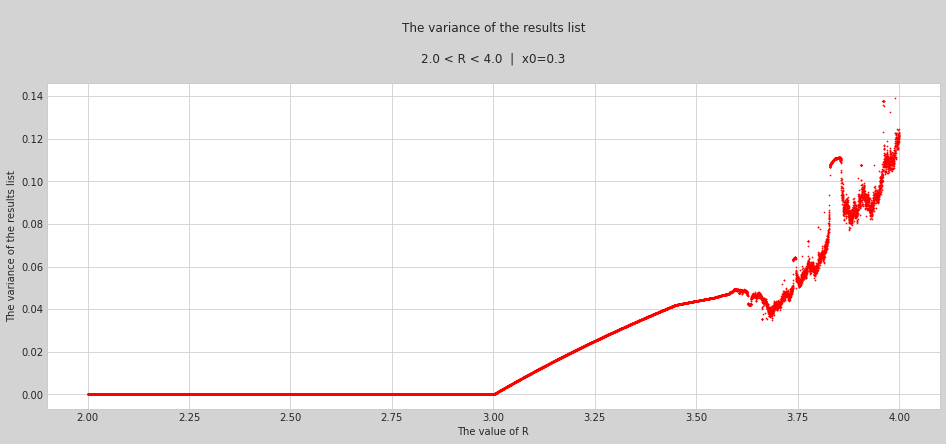

In [22]:
R_list = np.linspace(2.0, 4.0, 20000)
x0 = 0.3
N = 1200

def logis(r):
    x_list = [x0]    
    for i in range(N-1):
        x_list.append(r * x_list[-1] * (1 - x_list[-1]))
    return x_list[200:]

variances_list = [] 
for r in R_list:
    variances_list.append(statistics.variance(logis(r)))
    
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 6), facecolor='lightgray')
plt.xlabel('The value of R')
plt.ylabel('The variance of the results list')
plt.title(f'\nThe variance of the results list\n\n2.0 < R < 4.0  |  x0=0.3\n')
plt.scatter(R_list, variances_list, color='red', s=0.5)
plt.savefig('results_variance.png')
plt.show()   

<div class="alert alert-success">  
</div>

# Summary & Conclusion

* The "Logistics Equation" seems extremely simple and completely deterministic: 
\begin{align*}
\\x_{t+1}&= Rx_t (1 - x_t)
\end{align*}

* But for example, when R = 4, in successive iterations, all the results of this equation are different. That is, it actually generates random numbers.

* When R = 4, chaos occurs. Even with the slightest change in x0, the next results are new random numbers.

* "Logistics Equation" has many applications in the study of natural systems and especially to better understand complex natural systems. Note, of course, that "Logistics Equation" is not the only equation that is sometimes in  chaos, but it may be the most famous.

* In this notebook, we introduced another astonishment. That is, we proved that exactly at the points of the bifurcation, all the results in successive repetitions are different, and the period is so-called infinite. Of course, the difference in numbers is not large and may not be considered chaos. However, if in a calculation, very large coefficients are multiplied by the results, the final results can be very different in successive iterations. This means that these small differences can cause problems.

#### Good Luck.

<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>